# Stock Market Price Prediction using Machine Learning
This notebook demonstrates a basic stock market prediction model using historical stock data.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [7]:
# Download historical stock data (Apple)
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2024-01-01')
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320429,24.789798,23.879978,24.778675,212818400
2015-01-05,23.635290,24.169170,23.448433,24.089088,257142000
2015-01-06,23.637512,23.897778,23.274918,23.699798,263188400
2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
2015-01-08,24.889898,24.947736,24.180283,24.298183,237458000


In [8]:
# Create a target variable (next day's closing price)
df['Target'] = df['Close'].shift(-1)

# Prepare features and labels
X = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
y = df['Target'].dropna()

# Align X and y
X = X[:-1]
y = y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.977854681311645


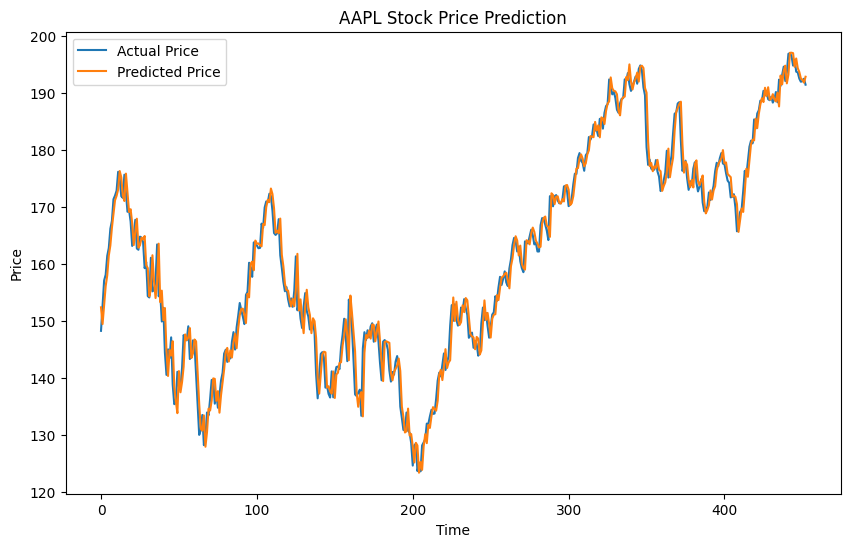

In [10]:
# Plot actual vs predicted prices using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [11]:
# Interactive Plot with Plotly
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(y=y_test.values, name='Actual'))
fig.add_trace(go.Scatter(y=predictions, name='Predicted'))
fig.update_layout(title=f'{ticker} Stock Price Prediction (Interactive)',
                  xaxis_title='Time',
                  yaxis_title='Price')
fig.show()